# Exercise: Simple Energy Balance Model

In this exercise we will develop a simple zero-dimensional energy balance model for the Earth. With this conceptual model we will look at complex interactions in the atmosphere with simplified processes. We will show how simple model can help to derive important insights into the Earth system and how sensitivity simulations provide a deeper understanding of the observed climate variability.

## Learning objectives:
- Develop a simple conceptual model
- Integrate a model in time
- How to set up sensitivity runs
- Equilibrium states in the Earth system
- Greenhouse effect


## Insights and open question:
- Why can we run climate simulations for many decades even though our predictability of weather events is very limited?

- With this model we will perform sensitivity simulations that will show us important processes in the atmosphere. 

## Problem description:
The model to be developed is zero-dimensional, i.e. we consider the Earth as a sphere and calculate the global averaged and long-term equilibrium of radiation fluxes. Furthermore, we neglect spatial variabilities. With this simple approach, Arthenius was already able to gain good insights in the 19th century. 

The energy balance is determined by the global radiation and the outgoing long-wave radiation. Part of the incoming short-wave radiation is reflected at the earth's surface. For this purpose, a global albedo is defined. According to the Stefan-Boltzmann law, the earth's surface radiates long-wave energy. Due to the path (transmission) through the atmosphere, part of this radiation energy is absorbed and remains in the Earth system. We also assume that the surface of the Earth is uniform with a constant heat capacity and a homogeneous surface temperature. 


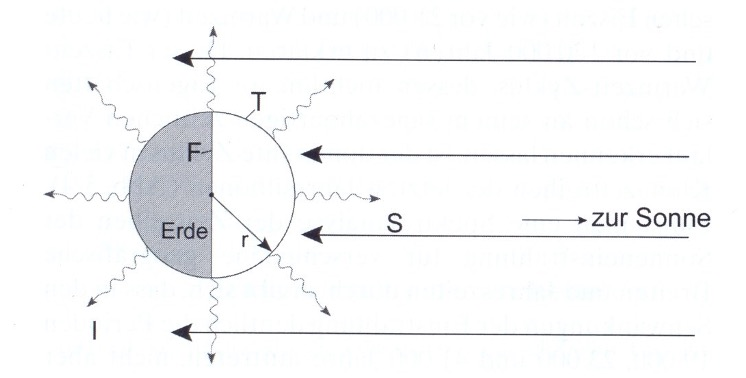

<img src="pics/ebm_02.jpg" width="600" >

### Task 2: Write a function ebm which solves the energy balance equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ebm(SWin,T0,c,alpha,tau,years):
    ''' This is a simple Energy Balance Model with global radiation and outgoing longwave radiation.

    Syntax: ebm(T0,c,alpha,tau)

    with
    T0     :: Initial temperature (Kelvin)
    c      :: Heat capacity J/(m2*K)
    alpha  :: Albedo [-]
    tau    :: Transmissivity [-]

    Example: ebm(273.2, 10e8, 0.3, 0.64)

    Author: Tobias Sauter
    Date:   06/04/2022
    '''

    # Constants
    epsilon = 5.67e-8;    # Stefan-Bolzmann Constant (W/(m2*K4);

    # Time step
    steps = 10;                           # days
    dt = 60*60*24*steps;                  # convert days to seconds
    integration = (365/steps)*years;      # Integrate over x years

    # Init arrays and variables
    timeseries = [];
    Ti = T0;

    # Calculation
    for z in range(int(integration)):
        T = Ti + (dt/c * (SWin - alpha*SWin - 0.95*epsilon*Ti**4*tau));  
        timeseries.append(T);
        Ti = T;
        
    return np.array(timeseries)



### Task 3: Integrate the equation over a time of 200 years and plot the result. Use the following initial and boundary conditions: 

$
\begin{align}
S_0 &=1360 ~ W m^{-2} \\
T(0)&= 273 ~ K \\ 
C_w &= 10^8 ~ J/(m^2 \cdot K) \\
\alpha &= 0.3 \\
\tau &= 0.64
\end{align}
$

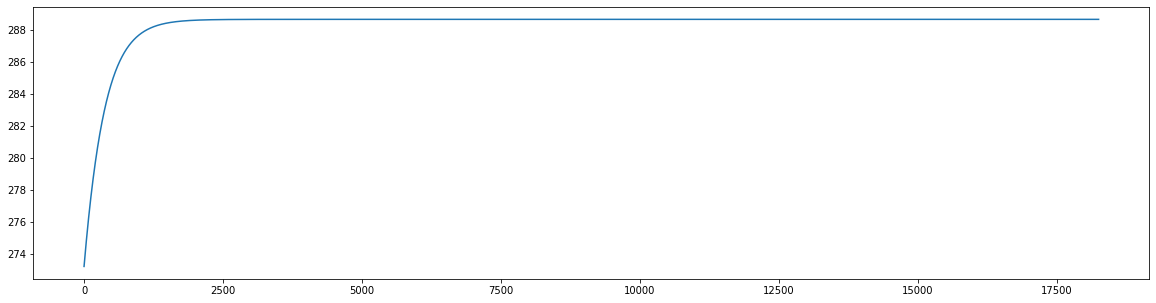

In [2]:
# Integrate the model
T_273 = ebm(342.0,273.2, 10e8, 0.3, 0.64, 500)

# Plot results
fig = plt.figure(figsize=(20,5))
plt.plot(T_273)

### Task 4: What happens if the intial temperature is set to 293 K ?

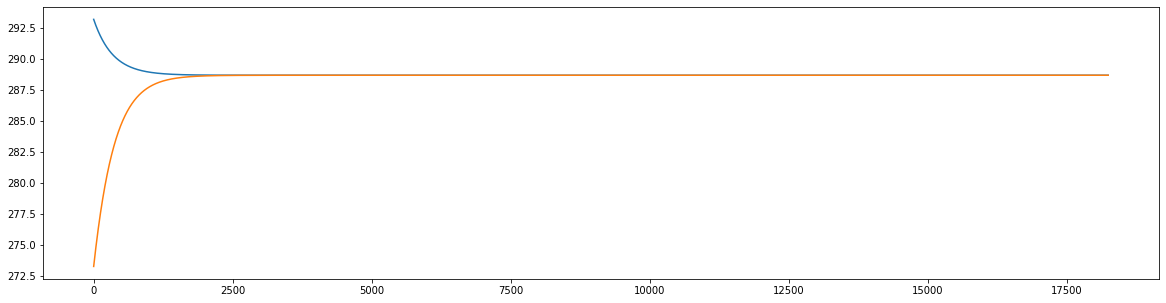

In [3]:
# Integrate the model
T_293 = ebm(342.0,293.2, 10e8, 0.3, 0.64, 500)

# Plot results
fig = plt.figure(figsize=(20,5))
plt.plot(T_293)
plt.plot(T_273)


### Task 5: What changes do you observe with a higher $C_w$ value (e.g. $C_w=10\cdot10^8 ~ J/(m^2 \cdot K)$)?


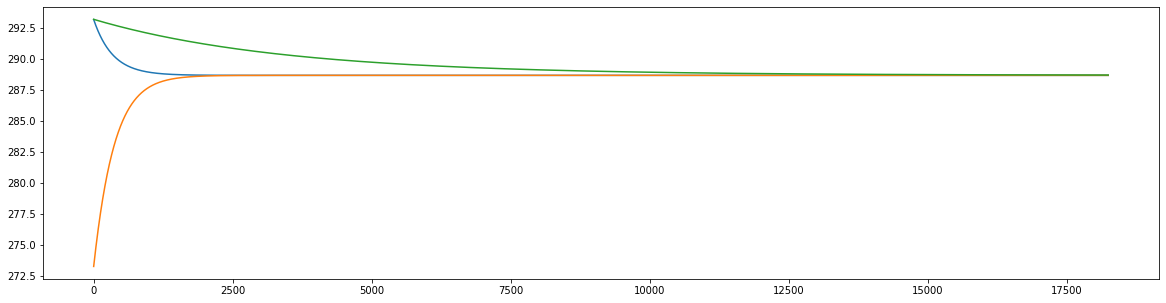

In [4]:
# Integrate the model
T_293_Cw = ebm(342.0,293.2, 10*10e8, 0.3, 0.64, 500)

# Plot results
fig = plt.figure(figsize=(20,5))
plt.plot(T_293)
plt.plot(T_273)
plt.plot(T_293_Cw)

### Task 6: How does the result change when $\tau=1$?

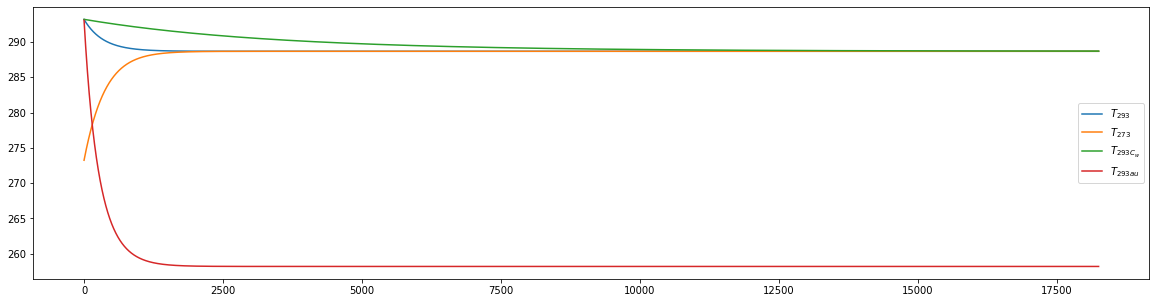

In [5]:
# Integrate the model
T_293_tau = ebm(342.0,293.2, 10e8, 0.3, 1.0, 500)

# Plot results
fig = plt.figure(figsize=(20,5))
plt.plot(T_293, label='$T_{293}$')
plt.plot(T_273, label='$T_{273}$')
plt.plot(T_293_Cw, label='$T_{293 C_w}$')
plt.plot(T_293_tau, label='$T_{293 \tau}$')

plt.legend()

### Case Study: Venus. 

Calculate the mean surface temperature on Venus. Due to its proximity to the Sun, Venus has a very high irradiance of $S_{0}=2619 ~ Wm^{-2}$. Due to the high cloud cover, the albedo is about 0.7. What surface temperature can be expected? (Use the previous values for $C_w$ and $\tau$).

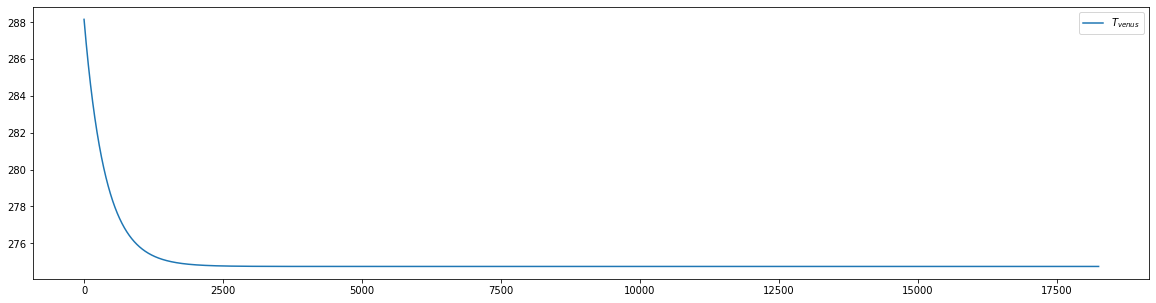

In [6]:
# Integrate the model
T_venus = ebm(2619/4, 288.2, 10e8, 0.7, 0.64, 500)

# Plot results
fig = plt.figure(figsize=(20,5))
plt.plot(T_venus, label='$T_{venus}$')
plt.legend()

### Compare the measurements with your simulation. 

Is there a difference? If so, why does this difference exist? (Use the model to prove your hypothesis)

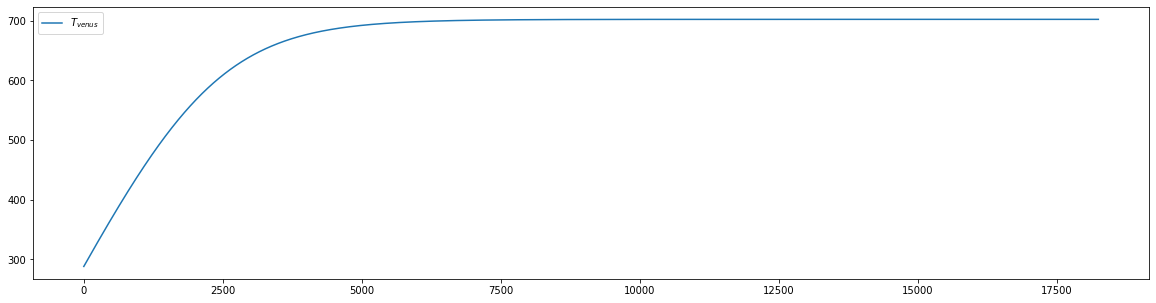

In [7]:
# Integrate the model
T_venus = ebm(2619/4, 288.2, 10e8, 0.7, 0.015, 500)

# Plot results
fig = plt.figure(figsize=(20,5))
plt.plot(T_venus, label='$T_{venus}$')
plt.legend()